In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def objective_function(x):
    output = np.sum(np.square(x))
    return output

In [3]:
nVar=10
ub= np.array([10]*nVar)
lb=np.array([-10]*nVar)

In [30]:
x=np.random.uniform(0,10,size=nVar)
# x

In [5]:
fobj = objective_function(x)

In [6]:
fobj

287.5475469579391

In [7]:
noP=30
maxIter=500
wMax=0.9
wMin=0.2
vMax = (ub - lb) * 0.2
vMin = -vMax
c1 = 2
c2 = 2
# vMax=None

In [8]:
class Swarm:
    
    def __init__(self):
        pass
    
    def create_particle(self,noP,nVar,ub,lb,vMin,vMax):
        return {'particles':
                [
                    {'X':(ub-lb) - np.random.rand(nVar) + lb,
                     'V':(vMax - vMin) * np.random.rand(nVar) + vMin,
                     'Pbest':
                     {
                      'X':np.zeros(nVar),
                      'O':np.inf
                     }
                    }
                    for i in range(noP)
                ],
               'Gbest':
                {
                    'X':np.zeros(nVar),
                    'O':np.inf
                }
               }

In [9]:
obj=Swarm()
swarm=obj.create_particle(noP,nVar,ub,lb,vMin,vMax)
    

In [10]:
# swarm


In [11]:
gbest=[]
for t in range(maxIter):
    for k in range(noP):
#         print(k)
        curX = swarm['particles'][k]['X']
        curO = objective_function(curX)
        
        if curO < swarm['particles'][k]['Pbest']['O']:
            swarm['particles'][k]['Pbest']['X']= curX.copy()
            swarm['particles'][k]['Pbest']['O'] = curO.copy()
            
        if curO < swarm['Gbest']['O']:
#             print(particals.GbestX)
            swarm['Gbest']['X']=curX.copy()
            swarm['Gbest']['O']=curO.copy()
            
        #update X,V
        w = wMax-(t+1) *((wMax-wMin)/maxIter)
#         print(w,k)
    for k in range(noP):

        swarm['particles'][k]['V'] = w*swarm['particles'][k]['V'] \
                      + c1 * np.random.rand(nVar)* (swarm['particles'][k]['Pbest']['X'] -swarm['particles'][k]['X'] )\
                      + c2 * np.random.rand(nVar)* (swarm['Gbest']['X']-swarm['particles'][k]['X'])    
        
        # limiting Velocity
        swarm['particles'][k]['V'] = np.minimum(swarm['particles'][k]['V'], vMax)
        swarm['particles'][k]['V'] = np.maximum(swarm['particles'][k]['V'], vMin)
        
        swarm['particles'][k]['X']=swarm['particles'][k]['X'] + swarm['particles'][k]['V']
        
        # limiting position
        swarm['particles'][k]['X'] = np.minimum(swarm['particles'][k]['X'], ub)
        swarm['particles'][k]['X'] = np.maximum(swarm['particles'][k]['X'], lb)
    gbest.append(swarm['Gbest']['O'])
    if t%50 ==0 :print(f'iteration {t} ')
        

iteration 0 
iteration 50 
iteration 100 
iteration 150 
iteration 200 
iteration 250 
iteration 300 
iteration 350 
iteration 400 
iteration 450 


In [12]:
# np.random.uniform(1,nVar,nVar)

In [13]:
swarm['Gbest']['O'],swarm['Gbest']['X']

(1.522245272400505e-22,
 array([ 4.18354274e-13, -2.18262818e-12,  1.20640746e-12, -8.42825681e-13,
         4.74915031e-12, -2.96955141e-12, -3.15634621e-12, -8.70961512e-12,
        -5.09855356e-12,  1.38997754e-12]))

In [14]:
def make_plot(gbests):
    fig = plt.figure()
    ax  = fig.add_subplot(1, 1, 1)
    ax.set_yscale('log')
    ax.set_ylabel('Value of GBEST')
    ax.set_xlabel('Iteration #')
    ax.plot(gbests)

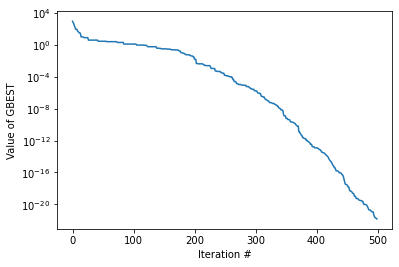

In [15]:
make_plot(gbest)

In [19]:
import seaborn as sns


In [49]:
# a=swarm['Gbest']['X']
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)
Z = np.zeros((X.shape))
for i in range(20):
    for j in range(20):
        Z[i,j] = objective_function([X[i,j],X[j,i]])

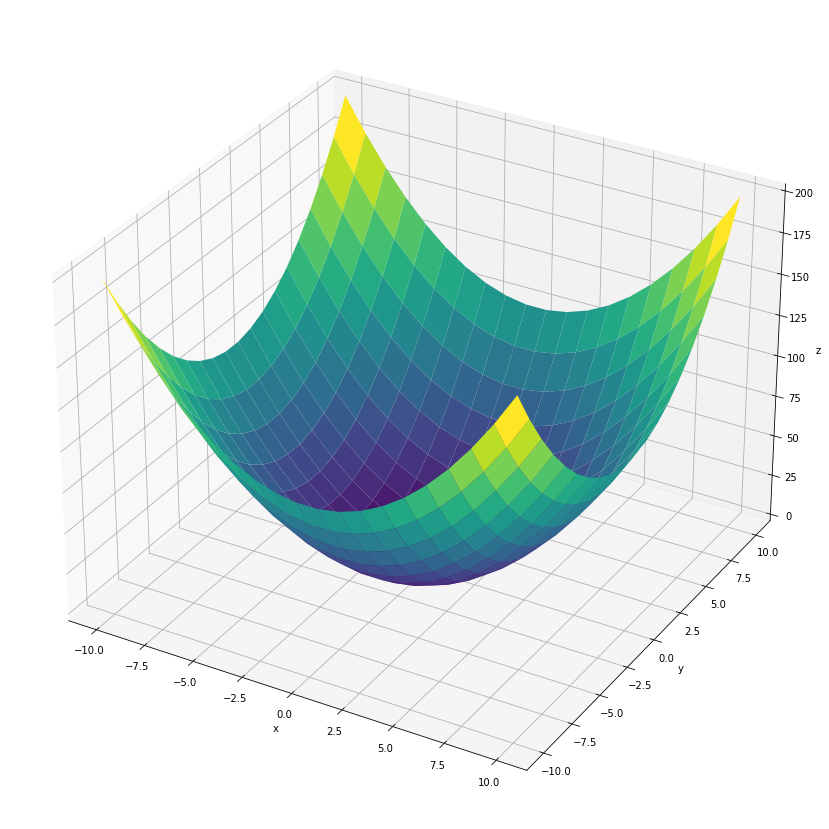

In [50]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.plot(xs=swarm['Gbest']['X']*100000,ys=swarm['Gbest']['X']*100000,marker='x', markersize=5, color="white")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [17]:
np.random.randint(1,nVar,nVar)

array([7, 8, 7, 7, 4, 2, 2, 1, 3, 2])

In [18]:
np.random.randint(1,nVar,nVar)

array([5, 9, 8, 7, 2, 8, 3, 2, 8, 4])